In [1]:
from helper import Helper
import statsmodels.api as sm

header, x_train = Helper.load_csv_to_ndarray('data/hw2p3_xtrain.csv')
header, y_train = Helper.load_csv_to_ndarray('data/hw2p3_ytrain.csv')
header, x_test = Helper.load_csv_to_ndarray('data/hw2p3_xtest.csv')

# print(x_train.shape)
# print(y_train.shape)
# print(x_test.shape)

In [2]:
from copy import copy
from sklearn.preprocessing import PolynomialFeatures

def create_linear_regression(x_train, y_train, degree):
    if degree == 1:
        return sm.OLS(y_train, sm.add_constant(x_train)).fit()
        
    polynomial_features= PolynomialFeatures(degree=degree)
    # e.g. if degree = 2 and x = (6.0)
    # then x would be -> (6.0, 36.0)
    x_train_modified = polynomial_features.fit_transform(x_train.reshape(-1, 1))
        
    # add intercept so that x = (1.0, 6.0, 36.0)
    x_train_modified = sm.add_constant(x_train_modified)
    
    return sm.OLS(y_train, x_train_modified).fit()

In [3]:
import numpy as np

affine_linear_functions = []

for i in range(0, 49):
    sub_x_train = x_train[:, i]
    sub_y_train = y_train[:, i]
    
    affine_linear_functions.append(create_linear_regression(sub_x_train, sub_y_train, 1))
    
y_test_plots = []
x_test_with_bias = sm.add_constant(x_test)

for i in range(0, 49):
    y_test_plots.append(affine_linear_functions[i].predict(x_test_with_bias))

average_y_test_plots = np.sum(y_test_plots, axis=0) * (1/49)

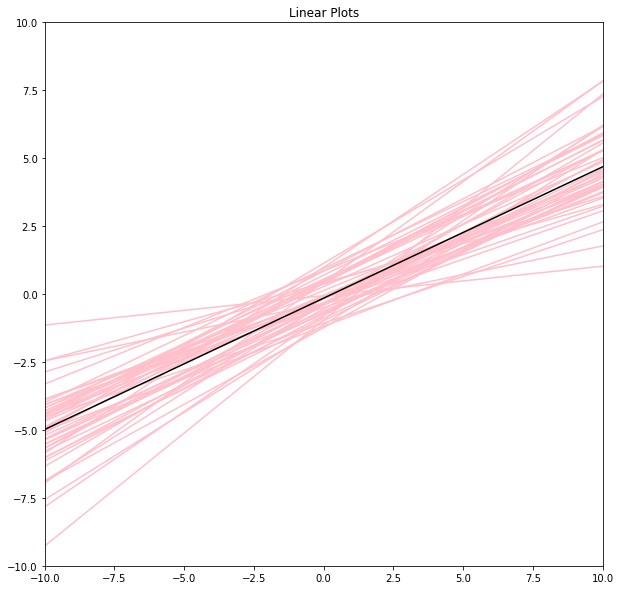

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10, 10))
plt.title('Linear Plots')

plt.xlim(-10, 10)
plt.ylim(-10, 10)

plt.xticks(np.arange(-10.0, 11.0, 2.5))
plt.yticks(np.arange(-10.0, 11.0, 2.5))

for i in range(0, 49):
    sub_x_train = x_train[:, i]
    sub_y_train = y_train[:, i]
    
    plt.plot(x_test, y_test_plots[i], color='pink')

plt.plot(x_test, average_y_test_plots, color='black')

plt.savefig('q3_linear_v2.png')
plt.show()

In [5]:
affine_quadratic_functions = []

for i in range(0, 49):
    sub_x_train = x_train[:, i]
    sub_y_train = y_train[:, i]
    
    affine_quadratic_functions.append(create_linear_regression(sub_x_train, sub_y_train, 2))
    
y_test_plots = []

polynomial_features= PolynomialFeatures(degree=2)
x_test_modified = polynomial_features.fit_transform(x_test.reshape(-1, 1))
x_test_with_bias = sm.add_constant(x_test_modified)

for i in range(0, 49):
    y_test_plots.append(affine_quadratic_functions[i].predict(x_test_with_bias))
    
average_y_test_plots = np.sum(y_test_plots, axis=0) * (1/49)

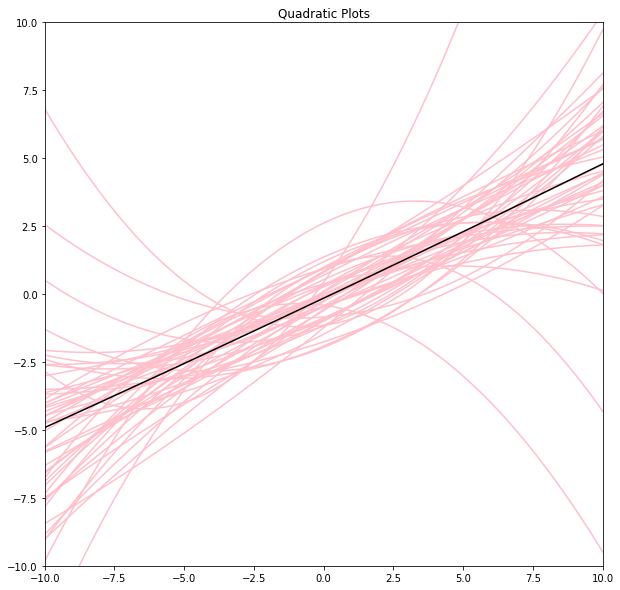

In [6]:
fig = plt.figure(figsize=(10, 10))
plt.title('Quadratic Plots')

plt.xlim(-10, 10)
plt.ylim(-10, 10)

plt.xticks(np.arange(-10.0, 11.0, 2.5))
plt.yticks(np.arange(-10.0, 11.0, 2.5))

for i in range(0, 49):
    sub_x_train = x_train[:, i]
    sub_y_train = y_train[:, i]
    
    plt.plot(x_test, y_test_plots[i], color='pink')

plt.plot(x_test, average_y_test_plots, color='black')

plt.savefig('q3_quadratic_v2.png')
plt.show()

In [7]:
affine_cubic_functions = []

for i in range(0, 49):
    sub_x_train = x_train[:, i]
    sub_y_train = y_train[:, i]
    
    affine_cubic_functions.append(create_linear_regression(sub_x_train, sub_y_train, 3))
    
y_test_plots = []

polynomial_features= PolynomialFeatures(degree=3)
x_test_modified = polynomial_features.fit_transform(x_test.reshape(-1, 1))
x_test_with_bias = sm.add_constant(x_test_modified)

for i in range(0, 49):
    y_test_plots.append(affine_cubic_functions[i].predict(x_test_with_bias))
    
average_y_test_plots = np.sum(y_test_plots, axis=0) * (1/49)

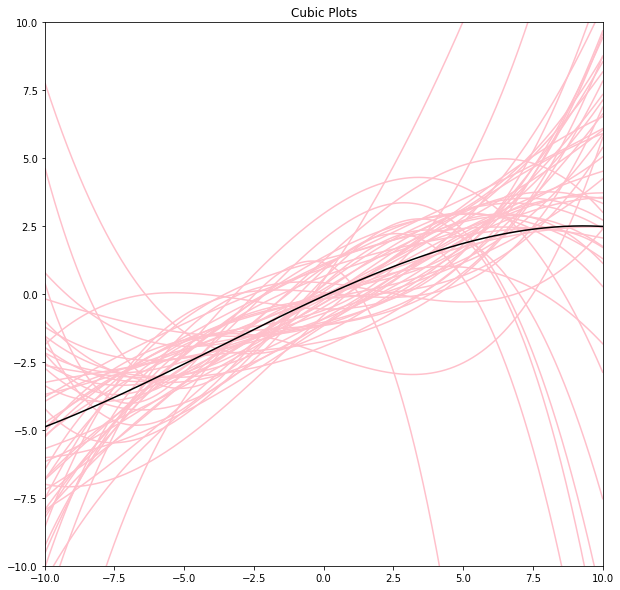

In [8]:
fig = plt.figure(figsize=(10, 10))
plt.title('Cubic Plots')

plt.xlim(-10, 10)
plt.ylim(-10, 10)

plt.xticks(np.arange(-10.0, 11.0, 2.5))
plt.yticks(np.arange(-10.0, 11.0, 2.5))

for i in range(0, 49):
    sub_x_train = x_train[:, i]
    sub_y_train = y_train[:, i]
    
    plt.plot(x_test, y_test_plots[i], color='pink')

plt.plot(x_test, average_y_test_plots, color='black')

plt.savefig('q3_cubic_v2.png')
plt.show()